# <u><center>Détectez des faux billets avec R ou Python</center></u>

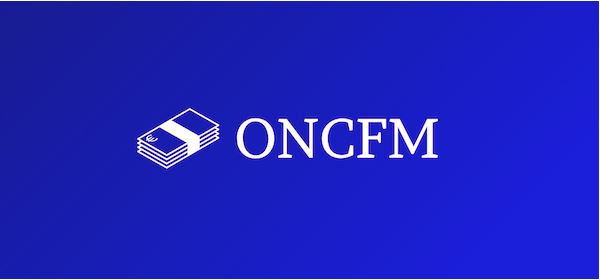

## Importing libraries:

First, let's import the necessary Python libraries for our data analysis. The libraries we will import include:

- **pandas** : for data manipulation and analysis in tabular form. ;
- **seaborn et matplotlib** : for data visualization with graphs ;
- **scipy.stats** : for performing statistical tests on the data. ;
- **scikit-learn** (sklearn) : for machine learning tasks on the data ;
- **statsmodels** : for more advanced statistical modeling.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as st
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
import math
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white , normal_ad
from sklearn.linear_model import LinearRegression
from statsmodels.api import Logit
from statsmodels.genmod.generalized_linear_model import GLM
from sklearn.metrics import roc_auc_score , roc_curve, accuracy_score , precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



## Importing the data:

Now let's import the data that we will use for our analysis. The data is stored in a CSV file named **"billets.csv"**. We will use the **.read_csv()** function to read the file and store it in a variable called **"data"**.


In [2]:
data = pd.read_csv("billets.csv" , sep=';')

# Displaying the data:

Let's examine the first five rows of our data using the **.head()** method.

In [3]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


The dataframe (df) is composed of the following columns:
- **is_genuine**: Booleans indicating whether the banknote is genuine or counterfeit.
- **diagonal**: The diagonal length of the banknote (in mm).
- **height_left**: The height of the banknote measured on the left side (in mm).
- **height_right**: The height of the banknote measured on the right side (in mm).
- **margin_low**: The margin between the bottom edge of the banknote and its image (in mm).
- **margin_up**: The margin between the top edge of the banknote and its image (in mm).
- **length**: The length of the banknote (in mm).



## Data Information

It is important to know the **structure of our data** before starting our analysis. Let's use the **.info()** method to display information about our data, such as:
- **the number of rows and columns**
- **the data type of each column**
- **the number of non-null values in each column**


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


We observe that the df consists of 1500 rows, and the number of non-null values in the **margin_low** column is 1463. Therefore, this column has **37 missing values**. This can be confirmed by using the combination of the **.isna() and .sum()** methods.

In [5]:
data.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

## Handling Duplicates

It is also important to check for duplicates in our dataset. Let's use the **.duplicated() and .sum()** methods to calculate the total number of duplicates in our df.

In [6]:
data.duplicated().sum()

0

That's great news! It's reassuring to know that there are no duplicates in the dataset.

## Summary Statistics

We can use the "describe" method in pandas to obtain a summary statistics of our data. This method provides information such as:
- mean,
- standard deviation,
- quartiles,
- minimum and maximum values for each column of our data.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
diagonal,1500.0,171.958440,0.305195,171.04,171.750,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.820,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.710,103.92,104.15,104.95
margin_low,1463.0,4.485967,0.663813,2.98,4.015,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.990,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.030,112.96,113.34,114.44


## Counting the Number of Genuine and Counterfeit Banknotes

It would be interesting to know the count of genuine and counterfeit banknotes. We can use the **.value_counts()** method to count the occurrences of each unique value in the **is_genuine** column of the df.

In [8]:
data.iloc[:,0].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

There are, therefore, **twice as many** genuine banknotes as counterfeit ones. To display the distribution as a percentage, you can specify **True** for the **normalize** parameter of the **.value_counts()** method.

In [9]:
data.iloc[:,0].value_counts(normalize=True)

True     0.666667
False    0.333333
Name: is_genuine, dtype: float64

As a picture is worth a thousand words:

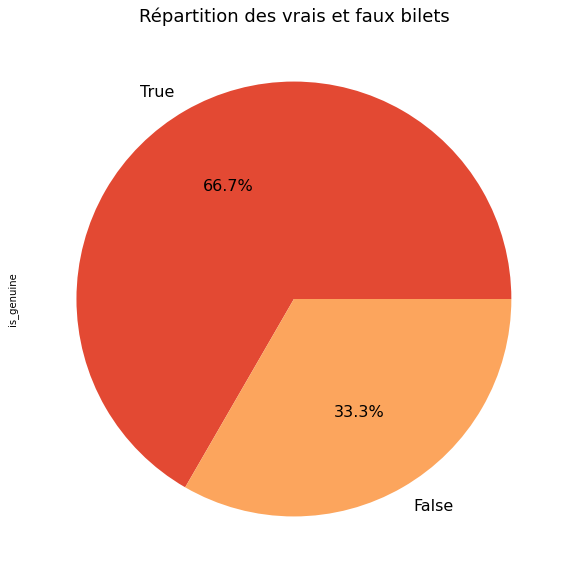

In [10]:
plt.figure(figsize=(15, 10))
sns.set_palette("RdYlBu")
data.iloc[:,0].value_counts().plot(kind="pie",autopct='%1.1f%%', textprops={'fontsize': 16})
plt.title("Répartition des vrais et faux bilets", fontsize=18)
plt.show()

Before diving into the descriptive analysis of our dataset, it is essential to address the issue of missing data.

We could consider the following options:

- Deleting the column with missing data (this would result in a significant loss of data and could potentially have a negative impact on our classification algorithm).
- Replacing the missing data with the mean or median value since it is a numeric variable (given that we have only 37 missing values, this approach could be feasible, but it could become problematic if we had a larger number of missing values).
- Deleting the rows with missing data (this is perhaps the simplest solution).

However, it seems we have a potential solution indicated by the post-it note!

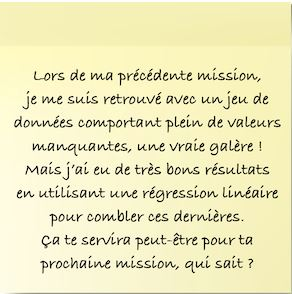

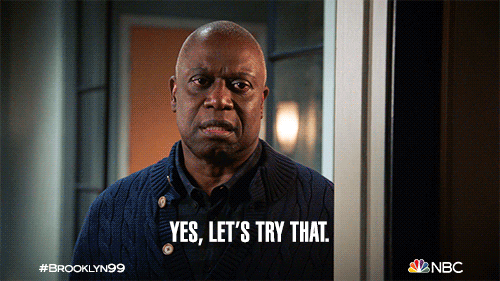